In [ ]:
import pandas as pd

dat = pd.read_csv('/content/drive/MyDrive/netflix_original_종합_수정(sum)_(정량화보함)2.csv')

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 82 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 589 non-null    int64  
 1   Title                      589 non-null    object 
 2   Genre                      589 non-null    object 
 3   Original Network           589 non-null    object 
 4   Premiere                   589 non-null    object 
 5   Seasons                    589 non-null    int64  
 6   Short_Length               585 non-null    object 
 7   Long_Length                585 non-null    object 
 8   Mean_Length                589 non-null    float64
 9   Netflix Exclusive Regions  589 non-null    object 
 10  Status                     170 non-null    object 
 11  Ratings                    589 non-null    float64
 12  Voters                     589 non-null    object 
 13  Director                   509 non-null    object 

In [ ]:
dat = dat.drop(['Unnamed: 0', 'Title', 'Genre', 'Original Network', 'Premiere', 'Short_Length', 'Long_Length', 'Netflix Exclusive Regions', 'Status', 'Director', 'Director_award', 'Stars', 'All_rating', 'Preview'], axis=1)

In [ ]:
dat = dat.iloc[:, :27]

In [ ]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seasons             589 non-null    int64  
 1   Mean_Length         589 non-null    float64
 2   Ratings             589 non-null    float64
 3   Voters              589 non-null    object 
 4   Director_max_award  510 non-null    float64
 5   18_rating           589 non-null    object 
 6   18_29_rating        589 non-null    float64
 7   30_44_rating        589 non-null    float64
 8   45_rating           589 non-null    float64
 9   Males_rating        589 non-null    float64
 10  Famales_rating      589 non-null    float64
 11  All voter           589 non-null    object 
 12  18_voter            589 non-null    object 
 13  18-29_voter         589 non-null    object 
 14  30-44_voter         589 non-null    object 
 15  45_voter            589 non-null    object 
 16  Males_vo

In [ ]:
dat = dat.dropna(axis=0, how='any').astype(str)
dat.reset_index(drop=True, inplace=True)

In [ ]:
import re

lst = dat.columns.to_list()
for i in lst:
  for j in range(len(dat)):
    dat[i][j] = re.sub("[,-]", '', dat[i][j])
    if dat[i][j] == '':
      dat[i][j] = '0'

dat.head(1)

,Seasons,Mean_Length,Ratings,Voters,Director_max_award,18_rating,18_29_rating,30_44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,Age,Year,Harmful_themes,Lewdness,Violence,Profanity,Fear,Drugs,Immatatable
0,1,50.5,8.7,468505,2.0,8.4,8.8,8.7,8.5,8.7,8.7,468910,95,91386,175163,43165,280510,58292,청소년관람불가,2018.0,높음,높음,높음,높음,보통,높음,높음


In [ ]:
pd.unique(dat['Harmful_themes'])

array(['높음', '다소높음', '.', '보통'], dtype=object)

In [ ]:
for i in range(20,27):
  for j in range(len(dat)):
    if dat.iloc[j,i]=='높음':
      dat.iloc[j,i]=3
    elif dat.iloc[j,i]=='다소높음':
      dat.iloc[j,i]=2
    elif dat.iloc[j,i]=='보통':
      dat.iloc[j,i]=1
    else:
      dat.iloc[j,i]=0

In [ ]:
for i in range(len(dat)):
  if dat['Age'][i]=='청소년관람불가':
    dat['Age'][i]=3
  elif dat['Age'][i]=='15세이상관람가':
    dat['Age'][i]=2
  else:
    dat['Age'][i]=1

In [ ]:
dat = dat.apply(pd.to_numeric, errors='coerce')
dat['Year'] = dat['Year'].astype(int)
dat['Director_max_award'] = dat['Director_max_award'].astype(int)
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seasons             503 non-null    int64  
 1   Mean_Length         503 non-null    float64
 2   Ratings             503 non-null    float64
 3   Voters              503 non-null    int64  
 4   Director_max_award  503 non-null    int64  
 5   18_rating           503 non-null    float64
 6   18_29_rating        503 non-null    float64
 7   30_44_rating        503 non-null    float64
 8   45_rating           503 non-null    float64
 9   Males_rating        503 non-null    float64
 10  Famales_rating      503 non-null    float64
 11  All voter           503 non-null    int64  
 12  18_voter            503 non-null    int64  
 13  18-29_voter         503 non-null    int64  
 14  30-44_voter         503 non-null    int64  
 15  45_voter            503 non-null    int64  
 16  Males_vo

In [ ]:
dat.describe()

,Seasons,Mean_Length,Ratings,Voters,Director_max_award,18_rating,18_29_rating,30_44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,Age,Year,Harmful_themes,Lewdness,Violence,Profanity,Fear,Drugs,Immatatable
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.00000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,0.182903,82.433400,6.519085,23505.143141,10.546720,5.500596,6.581909,6.463022,6.416899,6.429225,6.64672,23587.922465,43.165010,4533.328032,8160.598410,2424.218688,12658.723658,3599.868787,2.240557,2018.232604,2.081511,1.262425,1.282306,1.783300,0.793241,1.330020,1.332008
std,0.386971,33.492195,1.030353,52886.535937,21.874354,2.409952,1.081707,1.021046,0.970549,1.032423,1.05403,52995.652254,116.439846,11076.143024,17681.046478,4605.459062,29297.090519,8010.352276,0.767742,1.355074,0.931582,1.187048,1.165501,1.061251,1.067910,1.108835,1.218675
min,0.000000,0.000000,2.500000,84.000000,0.000000,0.000000,2.300000,2.600000,2.900000,2.600000,2.20000,84.000000,0.000000,19.000000,8.000000,29.000000,4.000000,1.000000,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,54.500000,5.900000,1973.500000,0.000000,5.000000,5.900000,5.800000,5.800000,5.800000,6.00000,1979.500000,3.000000,331.500000,629.500000,256.000000,891.000000,202.500000,2.000000,2017.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,92.000000,6.500000,5688.000000,3.000000,6.000000,6.600000,6.500000,6.400000,6.400000,6.70000,5891.000000,9.000000,1013.000000,1978.000000,763.000000,2648.000000,871.000000,2.000000,2018.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000
75%,0.000000,104.000000,7.200000,19147.500000,10.000000,7.000000,7.300000,7.200000,7.100000,7.200000,7.40000,19178.500000,34.000000,3669.000000,7197.000000,2298.000000,9459.000000,3777.500000,3.000000,2019.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,1.000000,209.000000,8.800000,468505.000000,203.000000,10.000000,9.000000,8.800000,8.600000,8.800000,8.80000,468910.000000,1700.000000,99323.000000,175163.000000,43165.000000,280510.000000,85931.000000,3.000000,2020.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [ ]:
for i in range(len(dat)):
  if dat['Ratings'][i] >= 6.500000:
    dat['Ratings'][i]=1
  else:
    dat['Ratings'][i]=0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
dat.head(1)

,Seasons,Mean_Length,Ratings,Voters,Director_max_award,18_rating,18_29_rating,30_44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,Age,Year,Harmful_themes,Lewdness,Violence,Profanity,Fear,Drugs,Immatatable
0,1,50.5,1.0,468505,2,8.4,8.8,8.7,8.5,8.7,8.7,468910,95,91386,175163,43165,280510,58292,3,2018,3,3,3,3,1,3,3


In [ ]:
# training set
from sklearn.model_selection import train_test_split

x = dat.drop(['Ratings'], axis=1)
y = dat.loc[:, 'Ratings']

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [ ]:
# standardization
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x_train)
x_train_ss = ss.transform(x_train)
x_test_ss = ss.transform(x_test) 

In [ ]:
# LogisitcRegression + GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2', 'l1'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
gs = GridSearchCV(estimator=lr, param_grid = param_grid, cv=5, n_jobs=-1)
gs.fit(x_train_ss, y_train)
print('best params: {}'.format(gs.best_params_))

best params: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
lr2 = gs.fit(x_train_ss, y_train)
print('train score: {}'.format(lr2.score(x_train_ss, y_train)))
print('test score: {}'.format(lr2.score(x_test_ss, y_test)))

train score: 0.986737400530504
test score: 0.9841269841269841


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# GridSearchCV가 coef_ 지원 x => best_params_를 다시 lr에 적합
lr3 = LogisticRegression(C=1, penalty='l1', solver='saga')
lr3.fit(x_train_ss, y_train)
print(lr3.coef_, lr3.intercept_)

[[ 0.03631386 -0.17762912  0.          0.2117162   0.          1.91549768
   2.13064221  1.10689707  2.14889428  0.93507349  0.          0.43727199
   0.          0.         -0.05855279  0.          0.         -0.15366248
   0.13954887  0.          0.05937269  0.          0.28836542 -0.09039498
  -0.0093099   0.        ]] [0.94259271]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# 평가 지표
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

pred_test = lr2.predict(x_test_ss)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        69
         1.0       0.97      1.00      0.98        57

    accuracy                           0.98       126
   macro avg       0.98      0.99      0.98       126
weighted avg       0.98      0.98      0.98       126



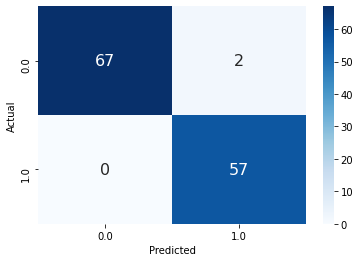

In [ ]:
# confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

conf_mx = confusion_matrix(y_test, pred_test)

heat_cm = pd.DataFrame(conf_mx, columns=np.unique(y_test), index = np.unique(y_test))
heat_cm.index.name = 'Actual'
heat_cm.columns.name = 'Predicted'

sns.heatmap(heat_cm, cmap="Blues", annot=True, annot_kws={"size": 16})

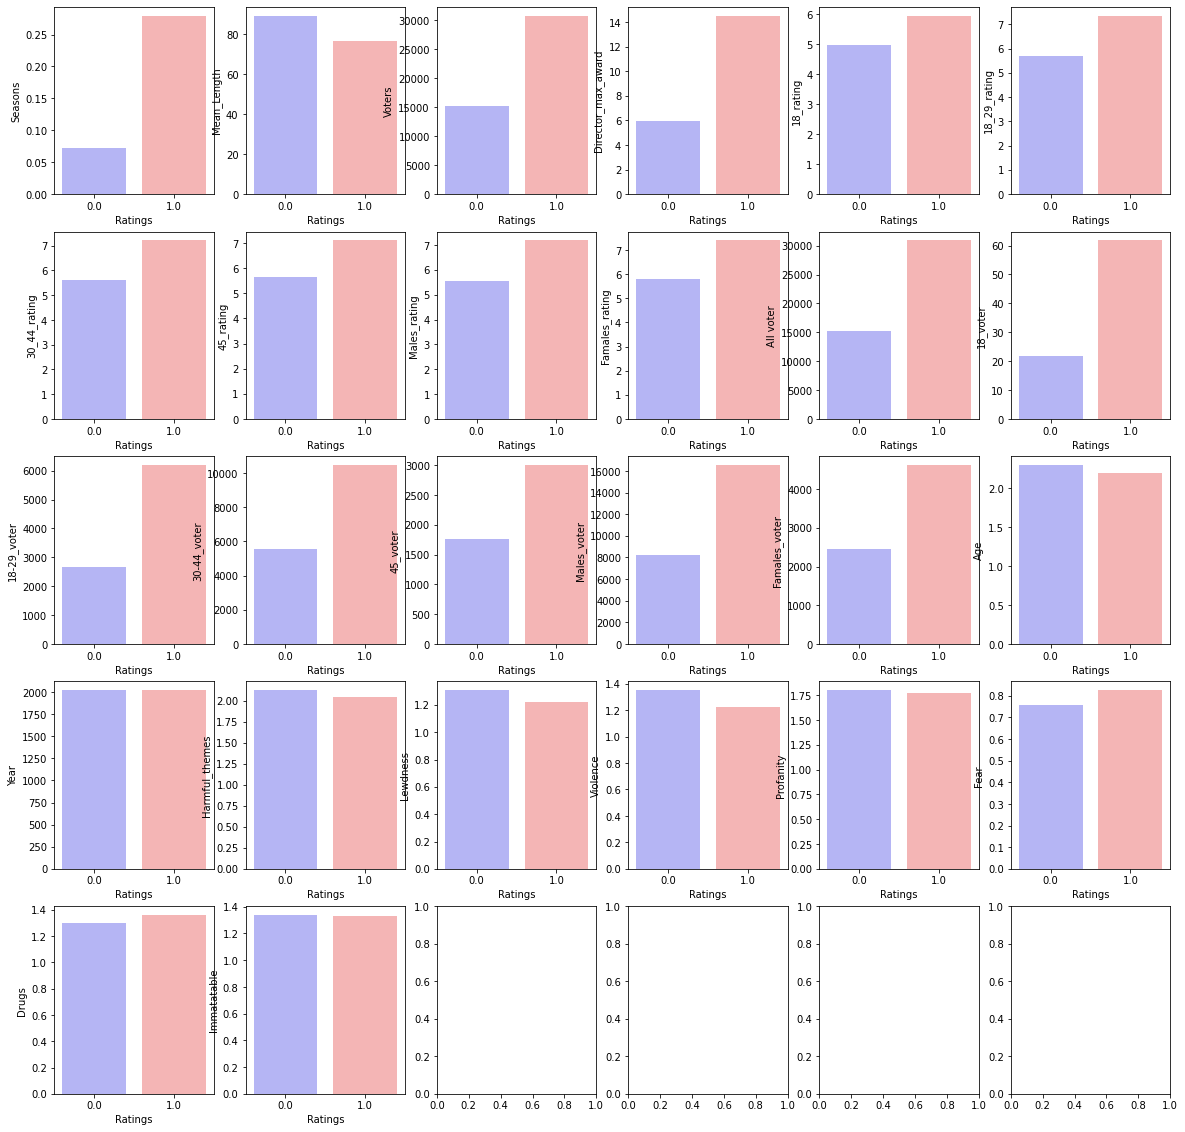

,Ratings,Seasons,Mean_Length,Voters,Director_max_award,18_rating,18_29_rating,30_44_rating,45_rating,Males_rating,Famales_rating,All voter,18_voter,18-29_voter,30-44_voter,45_voter,Males_voter,Famales_voter,Age,Year,Harmful_themes,Lewdness,Violence,Profanity,Fear,Drugs,Immatatable
0,0.0,0.072340,89.308511,15212.182979,5.987234,4.975745,5.690213,5.608936,5.632340,5.570213,5.792340,15258.92766,21.953191,2653.451064,5554.770213,1768.651064,8264.574468,2445.191489,2.289362,2018.378723,2.123404,1.306383,1.348936,1.800000,0.757447,1.297872,1.336170
1,1.0,0.279851,76.404851,30776.955224,14.544776,5.960821,7.363806,7.211940,7.104851,7.182463,7.395896,30891.33209,61.764925,6181.727612,10445.559701,2999.063433,16511.802239,4612.365672,2.197761,2018.104478,2.044776,1.223881,1.223881,1.768657,0.824627,1.358209,1.328358


In [ ]:
# 성공, 실패 집단 평균 비교
import matplotlib.pyplot as plt
import seaborn as sns

central = dat.groupby('Ratings').mean().reset_index()
features = list(central.keys()[1:])

fig, ax = plt.subplots(5, 6, figsize=(20,20))

ax = ax.ravel()
position = 0

for i in features:
  sns.barplot(data=central, x='Ratings', y=i, ax=ax[position], palette='bwr')
  position += 1

plt.show()
display(central)

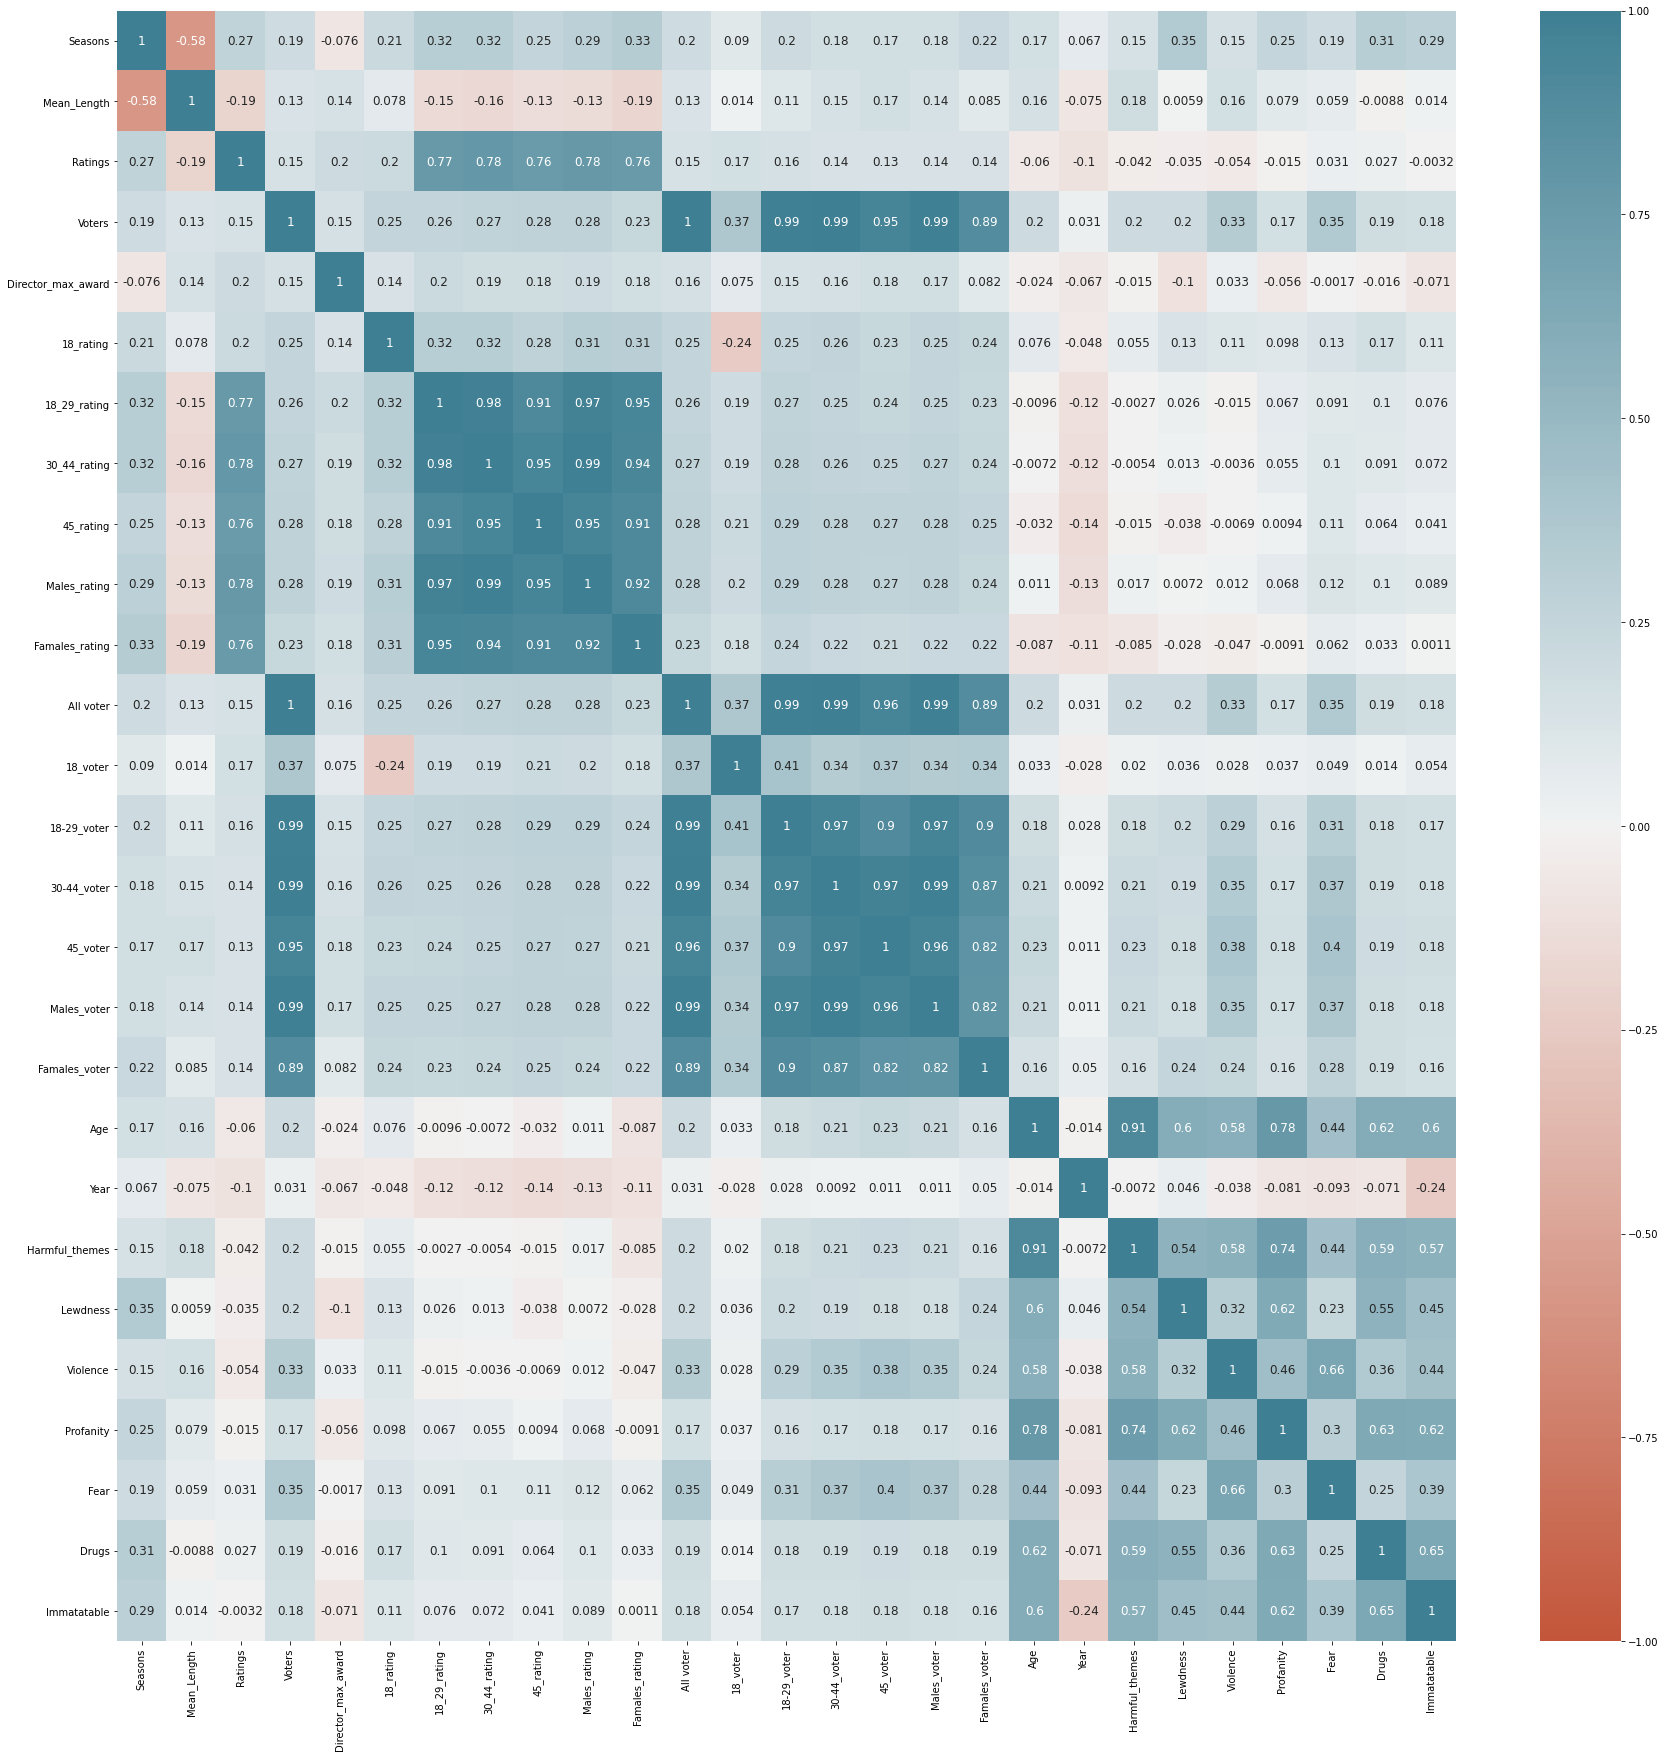

In [ ]:
# Correlations
fig, ax = plt.subplots(figsize=(30,30))

sns.heatmap(dat.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, annot_kws={'size':12})